# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\admin\AppData\Local\Temp\ipykernel_11144\1296089630.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load Your Data

In [2]:
df1=pd.read_csv(r"C:\Users\admin\Desktop\next hike\project-5\user_experience_data.csv")

In [3]:
df1.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Total DL (Bytes),Duration (s),Total Traffic (Bytes),Total Session Duration (s),Cluster,Engagement Cluster,Average_RTT,Average_Throughput,TCP_Retransmission,user_experience
0,0,0,0,1.311448e+19,0.770771,0.662663,0.000981,0.414307,NaN,0.355933,...,0.336846,9.807342e-07,3732.549575,0.000245,2,2,0.000568,0.000406,0.005112,0
1,1,1,1,1.311448e+19,0.235235,0.606607,0.000733,0.414353,NaN,0.358701,...,0.721401,7.331640e-07,3696.557910,0.000323,2,0,0.000686,0.000243,0.005112,0
2,2,2,2,1.311448e+19,0.001001,0.652653,0.000731,0.414194,NaN,0.353501,...,0.304394,7.313597e-07,2610.365711,0.000190,0,2,0.001799,0.000085,0.005112,0
3,3,3,3,1.311448e+19,0.486486,0.171171,0.000710,0.414303,NaN,0.354263,...,0.936439,7.096271e-07,9097.031894,0.000582,0,0,0.001799,0.000434,0.005112,0
4,4,4,4,1.311448e+19,0.565566,0.954955,0.000584,0.414303,NaN,0.354774,...,0.627361,5.841003e-07,570.500780,0.000047,0,2,0.001799,0.000085,0.005112,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149429 entries, 0 to 149428
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0.2                    149429 non-null  int64  
 1   Unnamed: 0.1                    149429 non-null  int64  
 2   Unnamed: 0                      149429 non-null  int64  
 3   Bearer Id                       149429 non-null  float64
 4   Start ms                        149429 non-null  float64
 5   End ms                          149429 non-null  float64
 6   Dur. (ms)                       149429 non-null  float64
 7   IMSI                            149429 non-null  float64
 8   MSISDN/Number                   0 non-null       float64
 9   IMEI                            149429 non-null  float64
 10  Avg RTT DL (ms)                 149429 non-null  float64
 11  Avg RTT UL (ms)                 149429 non-null  float64
 12  Avg Bearer TP DL

In [5]:
df1.isnull().sum()

Unnamed: 0.2                           0
Unnamed: 0.1                           0
Unnamed: 0                             0
Bearer Id                              0
Start ms                               0
End ms                                 0
Dur. (ms)                              0
IMSI                                   0
MSISDN/Number                     149429
IMEI                                   0
Avg RTT DL (ms)                        0
Avg RTT UL (ms)                        0
Avg Bearer TP DL (kbps)                0
Avg Bearer TP UL (kbps)                0
TCP DL Retrans. Vol (Bytes)            0
TCP UL Retrans. Vol (Bytes)            0
DL TP < 50 Kbps (%)                    0
50 Kbps < DL TP < 250 Kbps (%)         0
250 Kbps < DL TP < 1 Mbps (%)          0
DL TP > 1 Mbps (%)                     0
UL TP < 10 Kbps (%)                    0
10 Kbps < UL TP < 50 Kbps (%)          0
50 Kbps < UL TP < 300 Kbps (%)         0
UL TP > 300 Kbps (%)                   0
Activity Duratio

In [6]:
# Dropping unnecessary columns
columns_to_drop = ['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Bearer Id', 'IMSI']
df1 = df1.drop(columns=columns_to_drop, errors='ignore')


In [7]:
# Handling missing values
df1.ffill(inplace=True)


In [8]:
# Detailed Analysis of User Engagement
engagement_metrics = ['Total Session Duration (s)', 'Total Traffic (Bytes)']
engagement_stats = df1[engagement_metrics].describe()
("Engagement Statistics:\n", engagement_stats)


('Engagement Statistics:\n',
        Total Session Duration (s)  Total Traffic (Bytes)
 count                1.494290e+05          149429.000000
 mean                 3.112569e-04            6088.881589
 std                  2.876122e-04            6168.549409
 min                  1.576509e-10               0.244332
 25%                  6.999487e-05            1324.904830
 50%                  2.492015e-04            3827.215058
 75%                  5.013052e-04            9097.031894
 max                  9.158846e-04           19895.678760)

In [9]:
# In-Depth User Experience Analysis
experience_metrics = ['Average_RTT', 'Average_Throughput', 'TCP_Retransmission']
experience_stats = df1[experience_metrics].describe()
("Experience Statistics:\n", experience_stats)


('Experience Statistics:\n',
          Average_RTT  Average_Throughput  TCP_Retransmission
 count  149429.000000       149429.000000        1.494290e+05
 mean        0.001096            0.015252        3.451247e-03
 std         0.000726            0.021611        2.333204e-03
 min         0.000000            0.000000        2.688349e-08
 25%         0.000467            0.000461        3.737421e-04
 50%         0.000861            0.000622        5.112285e-03
 75%         0.001799            0.032265        5.112285e-03
 max         0.003791            0.080617        1.221715e-02)

In [10]:
# Calculate Engagement Score:
df1['Engagement_Score'] = (df1['Total Session Duration (s)'] + df1['Total UL (Bytes)'] + df1['Total DL (Bytes)']) / 3


In [11]:
# Calculate Experience Score:
df1['Experience_Score'] = (max(df1['Average_Throughput']) - df1['Average_RTT'] - df1['TCP_Retransmission']) / 3


In [12]:
# Calculate Satisfaction Score:
df1['Satisfaction_Score'] = (df1['Engagement_Score'] + df1['Experience_Score']) / 2

In [13]:
correlation_matrix = df1[['Engagement_Score', 'Experience_Score', 'Satisfaction_Score']].corr()
print("Correlation Matrix:", correlation_matrix)


Correlation Matrix:                     Engagement_Score  Experience_Score  Satisfaction_Score
Engagement_Score            1.000000         -0.001957            0.999971
Experience_Score           -0.001957          1.000000            0.005629
Satisfaction_Score          0.999971          0.005629            1.000000


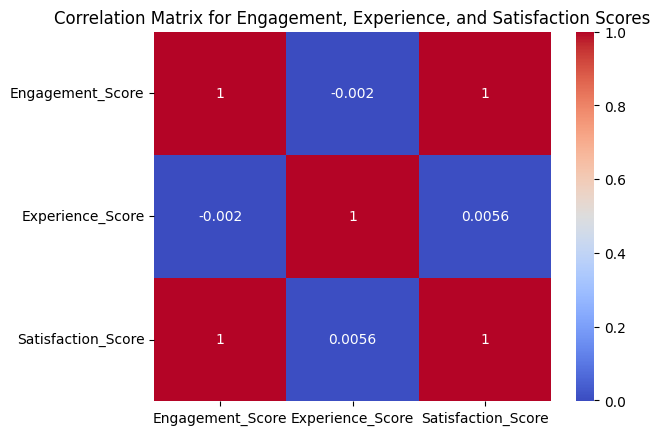

In [14]:
# Visualization of Correlation Matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Engagement, Experience, and Satisfaction Scores')
plt.show()

# Linear Regression:

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [16]:
# Assuming df is your DataFrame and the relevant columns are included
X = df1[['Engagement_Score', 'Experience_Score']]  # predictors
y = df1['Satisfaction_Score']  # response variable


In [17]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
# Predictions
y_pred = model.predict(X_test)

In [20]:
# Evaluation
("Mean Squared Error:", mean_squared_error(y_test, y_pred))


('Mean Squared Error:', 9.008036918497804e-34)

In [21]:
("Coefficient of Determination (R^2):", r2_score(y_test, y_pred))

('Coefficient of Determination (R^2):', 1.0)

# Decision Trees:

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [23]:
# Predictions and Evaluation
tree_pred = tree_model.predict(X_test)
("Mean Squared Error:", mean_squared_error(y_test, tree_pred))

('Mean Squared Error:', 4.331612263059886e-09)

# Random Forest Models:

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
# Predictions and Evaluation
forest_pred = forest_model.predict(X_test)
("Mean Squared Error:", mean_squared_error(y_test, forest_pred))

('Mean Squared Error:', 2.4123191541840205e-09)

# K-Means Clustering:

In [26]:
# Selecting data for clustering
clustering_data = df1[['Engagement_Score', 'Experience_Score']]


In [27]:
from sklearn.cluster import KMeans

# Assuming clustering_data is already defined and prepared for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data)


In [28]:
# Adding cluster information to the DataFrame
df1['Cluster'] = clusters


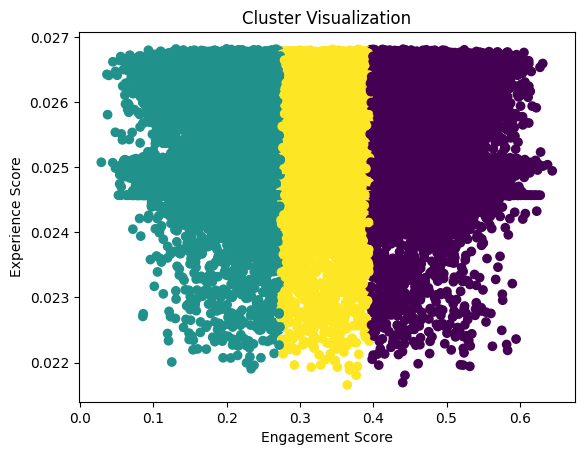

In [29]:
# Visualization of clusters
plt.scatter(df1['Engagement_Score'], df1['Experience_Score'], c=df1['Cluster'])
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('Cluster Visualization')
plt.show()

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


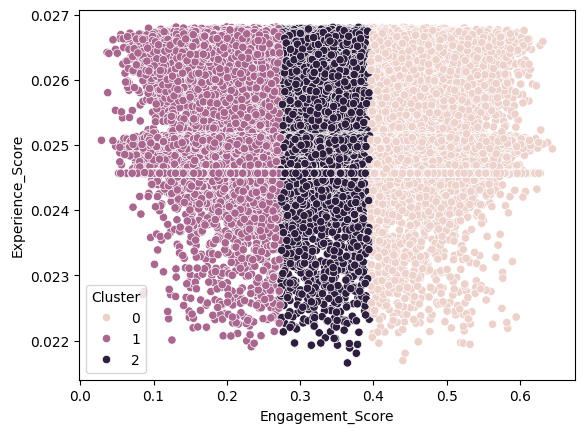

In [30]:
# Scatter Plot
sns.scatterplot(x='Engagement_Score', y='Experience_Score', hue='Cluster', data=df1)
plt.show()

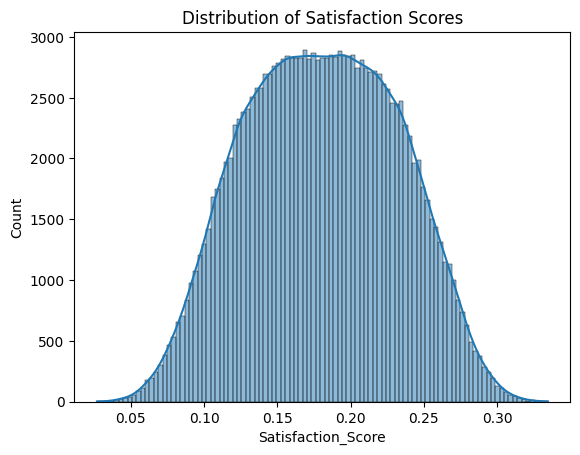

In [31]:
# Histogram
sns.histplot(df1['Satisfaction_Score'], kde=True)
plt.title('Distribution of Satisfaction Scores')
plt.show()

In [32]:
# Save the updated DataFrame to a new CSV file
df1.to_csv('satisfaction_score.csv', index=True)


In [33]:
from scipy.spatial.distance import euclidean

In [34]:
df2 = pd.read_csv(r"C:\Users\admin\Desktop\next hike\project-5\satisfaction_score.csv")

In [35]:
df2.head()

,Unnamed: 0,Start ms,End ms,Dur. (ms),MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Total Session Duration (s),Cluster,Engagement Cluster,Average_RTT,Average_Throughput,TCP_Retransmission,user_experience,Engagement_Score,Experience_Score,Satisfaction_Score
0,0,0.770771,0.662663,0.000981,NaN,0.355933,0.000433,0.000702,0.000061,0.000751,...,0.000245,1,2,0.000568,0.000406,0.005112,0,0.262027,0.024979,0.143503
1,1,0.235235,0.606607,0.000733,NaN,0.358701,0.000671,0.000702,0.000042,0.000444,...,0.000323,0,0,0.000686,0.000243,0.005112,0,0.465552,0.024939,0.245246
2,2,0.001001,0.652653,0.000731,NaN,0.353501,0.001115,0.002482,0.000016,0.000154,...,0.000190,1,2,0.001799,0.000085,0.005112,0,0.212029,0.024569,0.118299
3,3,0.486486,0.171171,0.000710,NaN,0.354263,0.001115,0.002482,0.000116,0.000751,...,0.000582,0,0,0.001799,0.000434,0.005112,0,0.491044,0.024569,0.257806
4,4,0.565566,0.954955,0.000584,NaN,0.354774,0.001115,0.002482,0.000016,0.000154,...,0.000047,2,2,0.001799,0.000085,0.005112,0,0.366720,0.024569,0.195644


In [36]:
# Select relevant features for engagement
engagement_features = ['Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

In [37]:
# Check for missing values and handle them (e.g., drop or impute)
df2 = df2.dropna(subset=engagement_features)
df2

,Unnamed: 0,Start ms,End ms,Dur. (ms),MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Total Session Duration (s),Cluster,Engagement Cluster,Average_RTT,Average_Throughput,TCP_Retransmission,user_experience,Engagement_Score,Experience_Score,Satisfaction_Score
0,0,0.770771,0.662663,0.000981,NaN,0.355933,0.000433,0.000702,0.000061,0.000751,...,0.000245,1,2,0.000568,0.000406,0.005112,0,0.262027,0.024979,0.143503
1,1,0.235235,0.606607,0.000733,NaN,0.358701,0.000671,0.000702,0.000042,0.000444,...,0.000323,0,0,0.000686,0.000243,0.005112,0,0.465552,0.024939,0.245246
2,2,0.001001,0.652653,0.000731,NaN,0.353501,0.001115,0.002482,0.000016,0.000154,...,0.000190,1,2,0.001799,0.000085,0.005112,0,0.212029,0.024569,0.118299
3,3,0.486486,0.171171,0.000710,NaN,0.354263,0.001115,0.002482,0.000116,0.000751,...,0.000582,0,0,0.001799,0.000434,0.005112,0,0.491044,0.024569,0.257806
4,4,0.565566,0.954955,0.000584,NaN,0.354774,0.001115,0.002482,0.000016,0.000154,...,0.000047,2,2,0.001799,0.000085,0.005112,0,0.366720,0.024569,0.195644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149424,149424,0.615616,0.407407,0.000028,NaN,0.354019,0.001115,0.001264,0.035196,0.023766,...,0.000582,0,0,0.001190,0.029481,0.003910,0,0.527025,0.025172,0.276099
149425,149425,0.451451,0.214214,0.000040,NaN,0.355547,0.000330,0.000000,0.000138,0.001109,...,0.000160,0,2,0.000165,0.000623,0.005112,0,0.452936,0.025113,0.239025
149426,149426,0.483483,0.187187,0.000049,NaN,0.357346,0.000279,0.000281,0.000061,0.000921,...,0.000272,0,0,0.000280,0.000491,0.005112,0,0.405693,0.025075,0.215384
149427,149427,0.283283,0.810811,0.000049,NaN,0.357962,0.000444,0.000843,0.000114,0.000802,...,0.000069,2,2,0.000643,0.000458,0.005112,0,0.359489,0.024954,0.192222


In [38]:
# Perform KMeans clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
df2['Cluster'] = kmeans_model.fit_predict(df2[engagement_features])


In [39]:
# Identify the centroid of the less engaged cluster
centroid_less_engaged = kmeans_model.cluster_centers_[0]
centroid_less_engaged

array([5.97865958e-05, 1.19130471e-03, 1.99468217e-03])

In [40]:
# Calculate Euclidean Distance for each user
def calculate_engagement_score(row):
    user_point = row[engagement_features].values
    return euclidean(user_point, centroid_less_engaged)


In [41]:
df2['Engagement_Score'] = df2.apply(calculate_engagement_score, axis=1)

In [42]:
df2.head()

,Unnamed: 0,Start ms,End ms,Dur. (ms),MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Total Session Duration (s),Cluster,Engagement Cluster,Average_RTT,Average_Throughput,TCP_Retransmission,user_experience,Engagement_Score,Experience_Score,Satisfaction_Score
0,0,0.770771,0.662663,0.000981,NaN,0.355933,0.000433,0.000702,0.000061,0.000751,...,0.000245,0,2,0.000568,0.000406,0.005112,0,0.001917,0.024979,0.143503
1,1,0.235235,0.606607,0.000733,NaN,0.358701,0.000671,0.000702,0.000042,0.000444,...,0.000323,0,0,0.000686,0.000243,0.005112,0,0.002044,0.024939,0.245246
2,2,0.001001,0.652653,0.000731,NaN,0.353501,0.001115,0.002482,0.000016,0.000154,...,0.000190,0,2,0.001799,0.000085,0.005112,0,0.002285,0.024569,0.118299
3,3,0.486486,0.171171,0.000710,NaN,0.354263,0.001115,0.002482,0.000116,0.000751,...,0.000582,0,0,0.001799,0.000434,0.005112,0,0.001768,0.024569,0.257806
4,4,0.565566,0.954955,0.000584,NaN,0.354774,0.001115,0.002482,0.000016,0.000154,...,0.000047,0,2,0.001799,0.000085,0.005112,0,0.002246,0.024569,0.195644


In [43]:
# Optionally, save the DataFrame
df2.to_csv('data_with_engagement_scores.csv', index=True)

In [44]:
from scipy.spatial.distance import euclidean

In [45]:
experience_features = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']


In [46]:
df2 = df2.dropna(subset=experience_features)
df2

,Unnamed: 0,Start ms,End ms,Dur. (ms),MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Total Session Duration (s),Cluster,Engagement Cluster,Average_RTT,Average_Throughput,TCP_Retransmission,user_experience,Engagement_Score,Experience_Score,Satisfaction_Score
0,0,0.770771,0.662663,0.000981,NaN,0.355933,0.000433,0.000702,0.000061,0.000751,...,0.000245,0,2,0.000568,0.000406,0.005112,0,0.001917,0.024979,0.143503
1,1,0.235235,0.606607,0.000733,NaN,0.358701,0.000671,0.000702,0.000042,0.000444,...,0.000323,0,0,0.000686,0.000243,0.005112,0,0.002044,0.024939,0.245246
2,2,0.001001,0.652653,0.000731,NaN,0.353501,0.001115,0.002482,0.000016,0.000154,...,0.000190,0,2,0.001799,0.000085,0.005112,0,0.002285,0.024569,0.118299
3,3,0.486486,0.171171,0.000710,NaN,0.354263,0.001115,0.002482,0.000116,0.000751,...,0.000582,0,0,0.001799,0.000434,0.005112,0,0.001768,0.024569,0.257806
4,4,0.565566,0.954955,0.000584,NaN,0.354774,0.001115,0.002482,0.000016,0.000154,...,0.000047,0,2,0.001799,0.000085,0.005112,0,0.002246,0.024569,0.195644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149424,149424,0.615616,0.407407,0.000028,NaN,0.354019,0.001115,0.001264,0.035196,0.023766,...,0.000582,2,0,0.001190,0.029481,0.003910,0,0.040377,0.025172,0.276099
149425,149425,0.451451,0.214214,0.000040,NaN,0.355547,0.000330,0.000000,0.000138,0.001109,...,0.000160,0,2,0.000165,0.000623,0.005112,0,0.001377,0.025113,0.239025
149426,149426,0.483483,0.187187,0.000049,NaN,0.357346,0.000279,0.000281,0.000061,0.000921,...,0.000272,0,0,0.000280,0.000491,0.005112,0,0.001559,0.025075,0.215384
149427,149427,0.283283,0.810811,0.000049,NaN,0.357962,0.000444,0.000843,0.000114,0.000802,...,0.000069,0,2,0.000643,0.000458,0.005112,0,0.001608,0.024954,0.192222


In [47]:
kmeans_exp_model = KMeans(n_clusters=3, random_state=42)
df2['Experience_Cluster'] = kmeans_exp_model.fit_predict(df2[experience_features])


In [48]:
centroid_worst_experience = kmeans_exp_model.cluster_centers_[0]  # Adjust the index based on your analysis


In [49]:
def calculate_experience_score(row):
    user_point = row[experience_features].values
    return euclidean(user_point, centroid_worst_experience)

df2['Experience_Score'] = df2.apply(calculate_experience_score, axis=1)


In [50]:
df2.head()

,Unnamed: 0,Start ms,End ms,Dur. (ms),MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Cluster,Engagement Cluster,Average_RTT,Average_Throughput,TCP_Retransmission,user_experience,Engagement_Score,Experience_Score,Satisfaction_Score,Experience_Cluster
0,0,0.770771,0.662663,0.000981,NaN,0.355933,0.000433,0.000702,0.000061,0.000751,...,0,2,0.000568,0.000406,0.005112,0,0.001917,0.001749,0.143503,0
1,1,0.235235,0.606607,0.000733,NaN,0.358701,0.000671,0.000702,0.000042,0.000444,...,0,0,0.000686,0.000243,0.005112,0,0.002044,0.001972,0.245246,0
2,2,0.001001,0.652653,0.000731,NaN,0.353501,0.001115,0.002482,0.000016,0.000154,...,0,2,0.001799,0.000085,0.005112,0,0.002285,0.002529,0.118299,0
3,3,0.486486,0.171171,0.000710,NaN,0.354263,0.001115,0.002482,0.000116,0.000751,...,0,0,0.001799,0.000434,0.005112,0,0.001768,0.002089,0.257806,0
4,4,0.565566,0.954955,0.000584,NaN,0.354774,0.001115,0.002482,0.000016,0.000154,...,0,2,0.001799,0.000085,0.005112,0,0.002246,0.002529,0.195644,0


In [51]:
df2.to_csv('data_with_experience_scores.csv', index=False)

In [52]:
# Calculate the Satisfaction Score:
df2['Satisfaction_Score'] = (df2['Engagement_Score'] + df2['Experience_Score']) / 2
df2['Satisfaction_Score']

0         0.001833
1         0.002008
2         0.002407
3         0.001929
4         0.002388
            ...   
149424    0.040392
149425    0.001617
149426    0.001700
149427    0.001623
149428    0.001788
Name: Satisfaction_Score, Length: 149429, dtype: float64

In [53]:
# Identify the Top 10 Satisfied Customers:
top_10_satisfied_customers = df2.sort_values(by='Satisfaction_Score', ascending=False).head(10)


In [54]:
# Use 'MSISDN/Number' as the customer identifier
(top_10_satisfied_customers[['MSISDN/Number', 'Engagement_Score', 'Experience_Score', 'Satisfaction_Score']])


,MSISDN/Number,Engagement_Score,Experience_Score,Satisfaction_Score
76553,NaN,0.135960,0.136020,0.135990
37243,NaN,0.135741,0.135781,0.135761
36485,NaN,0.135721,0.135750,0.135736
4424,NaN,0.135590,0.135620,0.135605
141455,NaN,0.135505,0.135553,0.135529
38659,NaN,0.135458,0.135499,0.135478
11395,NaN,0.135396,0.135432,0.135414
66901,NaN,0.135031,0.135114,0.135073
6034,NaN,0.134954,0.134980,0.134967
126626,NaN,0.134912,0.134945,0.134929


In [55]:
top_10_satisfied_customers.to_csv('top_10_satisfied_customers.csv', index=True)

In [56]:
X = df2.drop(['Satisfaction_Score', 'MSISDN/Number'], axis=1)  # Drop non-feature columns
y = df2['Satisfaction_Score']


In [57]:
# Handle missing values (if any)
X = X.fillna(method='ffill')


C:\Users\admin\AppData\Local\Temp\ipykernel_11144\2387759118.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')


In [58]:
from sklearn.preprocessing import StandardScaler

# Scaling features (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [59]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [61]:
# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 4.700771449294521e-11
R² Score: 0.9999999580159605


In [63]:
# Using the Model for Prediction
# Select the same features used for training
df2_features = df2.drop(['Satisfaction_Score', 'MSISDN/Number'], axis=1)

In [64]:
# Predict satisfaction scores
predicted_scores = model.predict(df2_features)

# Add predictions to the new_data DataFrame
df2['Predicted_Satisfaction_Score'] = predicted_scores


In [65]:
# Display the DataFrame with the predictions
(df2[['MSISDN/Number', 'Predicted_Satisfaction_Score']])


,MSISDN/Number,Predicted_Satisfaction_Score
0,NaN,0.001763
1,NaN,0.002011
2,NaN,0.002408
3,NaN,0.001928
4,NaN,0.002384
...,...,...
149424,NaN,0.040391
149425,NaN,0.001619
149426,NaN,0.001701
149427,NaN,0.001623


In [66]:
# Extracting the required columns
data = df2[['Engagement_Score', 'Experience_Score']]


In [67]:
# Running K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=2, random_state=42)

In [68]:
# Getting cluster centers
centroids = kmeans.cluster_centers_
centroids

array([[0.0091095 , 0.00936511],
       [0.08250379, 0.08254564]])

In [69]:
# Assigning the clusters to each data point
clusters = kmeans.labels_


In [70]:
# Adding the cluster information to the original DataFrame
df2['Cluster'] = clusters


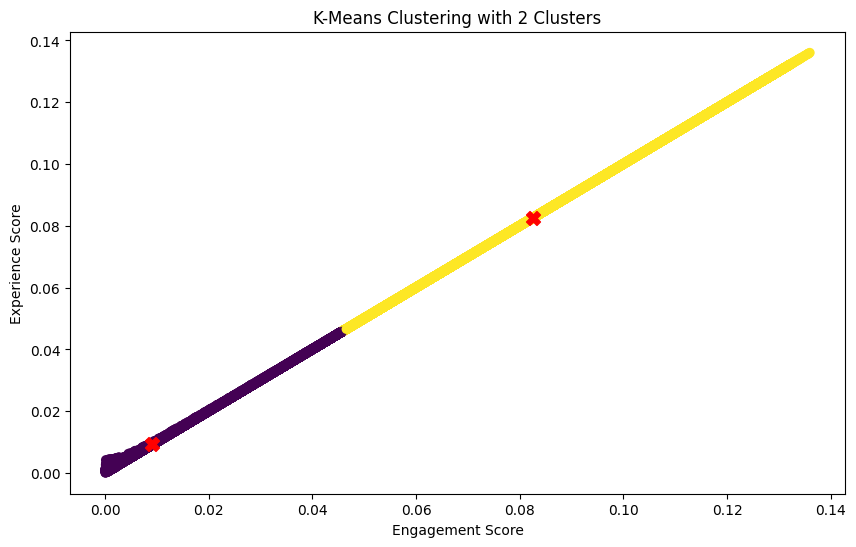

In [71]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Engagement_Score'], data['Experience_Score'], c=df2['Cluster'], cmap='viridis')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('K-Means Clustering with 2 Clusters')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100) # Marking the centroids
plt.show()

In [72]:
# Grouping by Cluster
grouped = df2.groupby('Cluster')
grouped

In [73]:
# Calculating the Average Scores
average_scores = grouped[['Satisfaction_Score', 'Experience_Score']].mean()
average_scores

,Satisfaction_Score,Experience_Score
Cluster,,
0,0.009217,0.009345
1,0.082444,0.082465


# Interpretation

#### Cluster Characteristics: 
Look at the characteristics of each cluster. One cluster might represent users with high engagement and experience scores, while the other might represent users with lower scores. The specific characteristics depend on your data and how the k-means algorithm divided it.

#### Average Satisfaction Score: 
This indicates the overall satisfaction level within each cluster. A higher average satisfaction score in a cluster suggests that users in that group are generally more satisfied compared to the other cluster.

#### Average Experience Score: 
Similarly, this reflects the general experience quality for users within each cluster. A higher score indicates better user experiences.

## Application of Insights:

#### Targeted Strategies: 
If one cluster shows significantly lower satisfaction or experience scores, you might develop targeted strategies to improve these aspects for that particular group of users.

#### Service Improvement:
Understanding which clusters are underperforming (in terms of satisfaction and experience) can guide resource allocation and service improvement efforts.

#### Customer Segmentation: 
These clusters can serve as a basis for customer segmentation in marketing and service delivery, allowing for more personalized approaches.

#### Cluster Trends and Anomalies: 
Investigate any trends or anomalies within each cluster. For example, if a cluster with high engagement scores has low satisfaction scores, it might indicate issues with service quality or unmet customer expectations despite high usage.

In [74]:
df2.to_csv('final_dat.csv', index=True)
